# Second Exploration: In-Depth Dataset Analysis

In this notebook, our goal is to conduct a deeper exploration of the variables in our dataset, in order to better understand their relationship with the dependent variable **Churn**.

## Objectives:
- Analyze the distributions of the variables in detail.
- Investigate possible correlations between the independent variables and **Churn**.
- Identify patterns or trends that may influence the likelihood of a customer churning.

This advanced exploration will give us a clearer view of which factors most directly affect **Churn**, providing the foundation for future feature selection and predictive model building.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np


%run ../telco_customer_churn/utils/pandas_explorer.py

## Dataset Load and First Visualization:

In [8]:
path = '../telco_customer_churn/data/cleaned_dataset.csv'
df = pd.read_csv(path).set_index('customerID')
df.head()

Gender  SeniorCitizen Partner Dependents  Tenure PhoneService  \
customerID                                                                  
7590-VHVEG  Female              0     Yes         No       1           No   
5575-GNVDE    Male              0      No         No      34          Yes   
3668-QPYBK    Male              0      No         No       2          Yes   
7795-CFOCW    Male              0      No         No      45           No   
9237-HQITU  Female              0      No         No       2          Yes   

           MultipleLines InternetService OnlineSecurity OnlineBackup  \
customerID                                                             
7590-VHVEG            No             DSL             No          Yes   
5575-GNVDE            No             DSL            Yes           No   
3668-QPYBK            No             DSL            Yes          Yes   
7795-CFOCW            No             DSL            Yes           No   
9237-HQITU            No     Fiber optic             No           No   

           DeviceProtection TechSupport StreamingTV StreamingMovies  \
customerID                                                            
7590-VHVEG               No          No          No              No   
5575-GNVDE              Yes          No          No              No   
3668-QPYBK               No          No          No              No   
7795-CFOCW              Yes         Yes          No              No   
9237-HQITU               No          No          No              No   

                  Contract PaperlessBilling              PaymentMethod  \
customerID                                                               
7590-VHVEG  Month-to-month              Yes           Electronic check   
5575-GNVDE        One year               No               Mailed check   
3668-QPYBK  Month-to-month              Yes               Mailed check   
7795-CFOCW        One year               No  Bank transfer (automatic)   
9237-HQITU  Month-to-month              Yes           Electronic check   

            MonthlyCharges  TotalCharges Churn  
customerID                                      
7590-VHVEG           29.85         29.85    No  
5575-GNVDE           56.95       1889.50    No  
3668-QPYBK           53.85        108.15   Yes  
7795-CFOCW           42.30       1840.75    No  
9237-HQITU           70.70        151.65   Yes

## Creating new features  (TenureCategory & M_ChargesCategory):

In [9]:
# Function to categorize a feature based on quantiles
def categorize_feature(df, feature, labels):
    # Calculate min, max, and quantiles
    min_value = df[feature].min()
    max_value = df[feature].max()
    Q1 = df[feature].quantile(0.25)
    Q2 = df[feature].quantile(0.50)
    Q3 = df[feature].quantile(0.75)

    # Define bins based on the calculated values
    bins = [min_value, Q1, Q2, Q3, max_value]

    # Use pd.cut to categorize the feature into bins
    df[feature + 'Category'] = pd.cut(df[feature], bins=bins, labels=labels, right=True)

    # Ensure the resulting category is of type 'object'
    df[feature + 'Category'] = df[feature + 'Category'].astype('object')

# Apply the function to 'Tenure' and 'MonthlyCharges' features
categorize_feature(df, 'Tenure', ['Very Short', 'Medium-Low', 'Medium-High', 'High'])
categorize_feature(df, 'MonthlyCharges', ['Low', 'Medium-Low', 'Medium-High', 'High'])
categorize_feature(df, 'TotalCharges', ['Low', 'Medium-Low', 'Medium-High', 'High'])
# Show the result
df[['TenureCategory', 'MonthlyChargesCategory','TotalChargesCategory']].head()


TenureCategory MonthlyChargesCategory TotalChargesCategory
customerID                                                           
7590-VHVEG            NaN                    Low                  Low
5575-GNVDE    Medium-High             Medium-Low          Medium-High
3668-QPYBK     Very Short             Medium-Low                  Low
7795-CFOCW    Medium-High             Medium-Low          Medium-High
9237-HQITU     Very Short            Medium-High                  Low

## Bivariate Analysis:

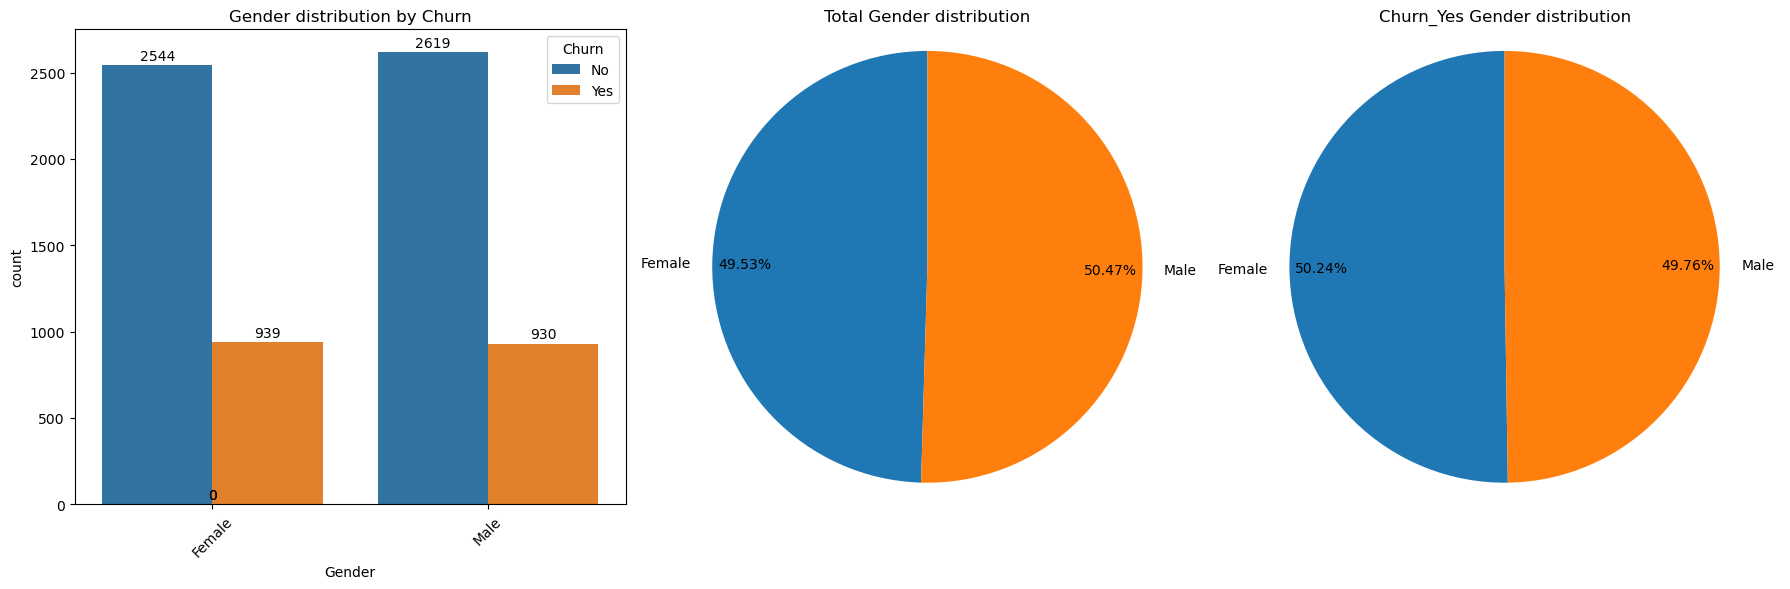

   Gender  Total Churn  Count      %
0    Male   3549    No   2619  73.80
1  Female   3483    No   2544  73.04
2  Female   3483   Yes    939  26.96
3    Male   3549   Yes    930  26.20


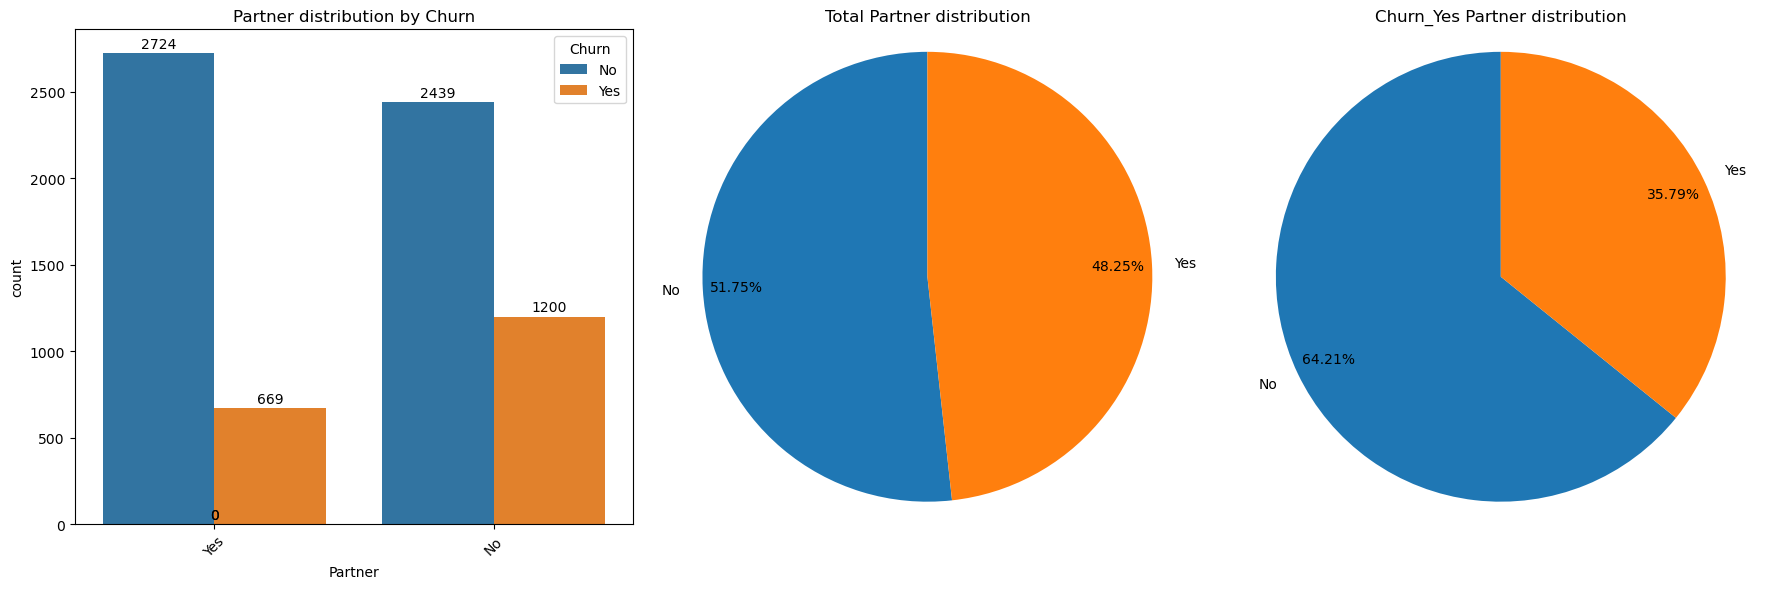

  Partner  Total Churn  Count      %
0     Yes   3393    No   2724  80.28
1      No   3639    No   2439  67.02
2      No   3639   Yes   1200  32.98
3     Yes   3393   Yes    669  19.72


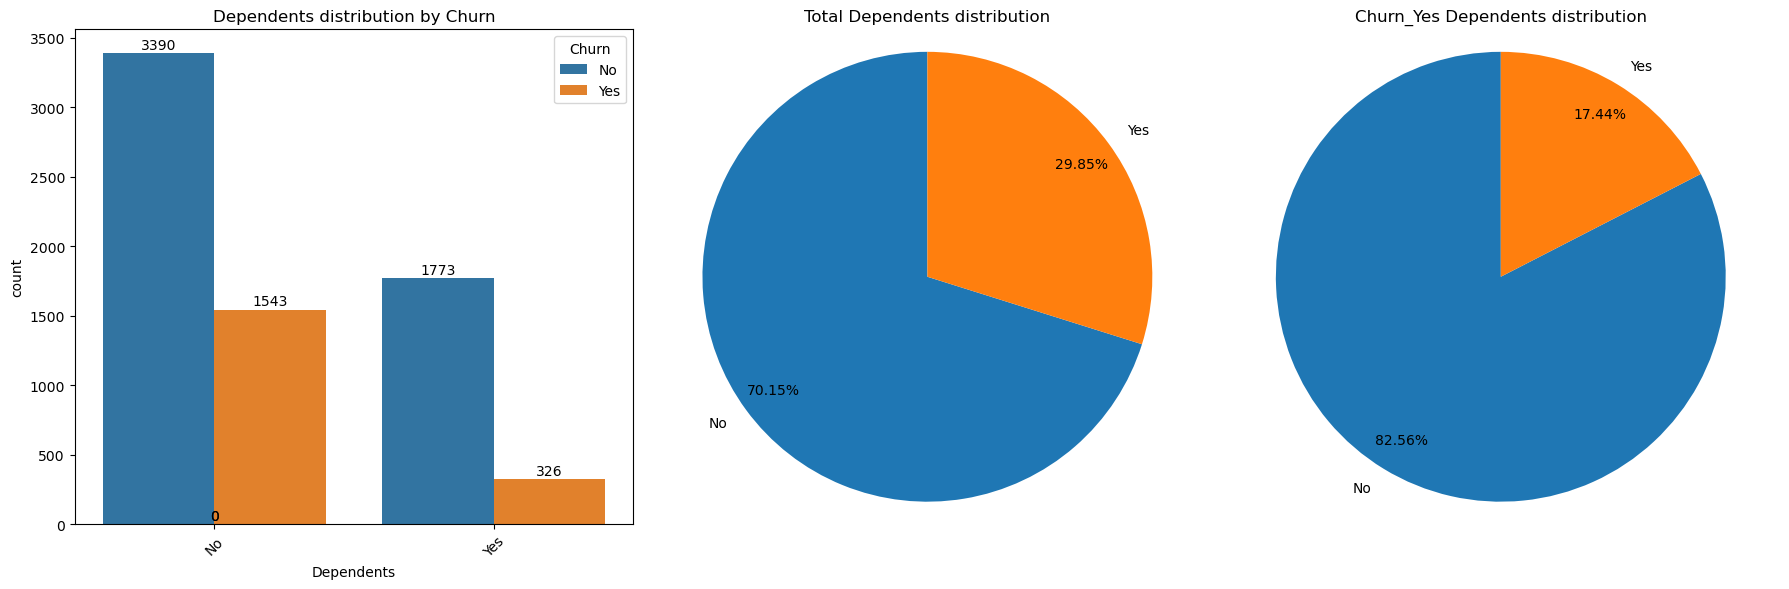

  Dependents  Total Churn  Count      %
0         No   4933    No   3390  68.72
1        Yes   2099    No   1773  84.47
2         No   4933   Yes   1543  31.28
3        Yes   2099   Yes    326  15.53


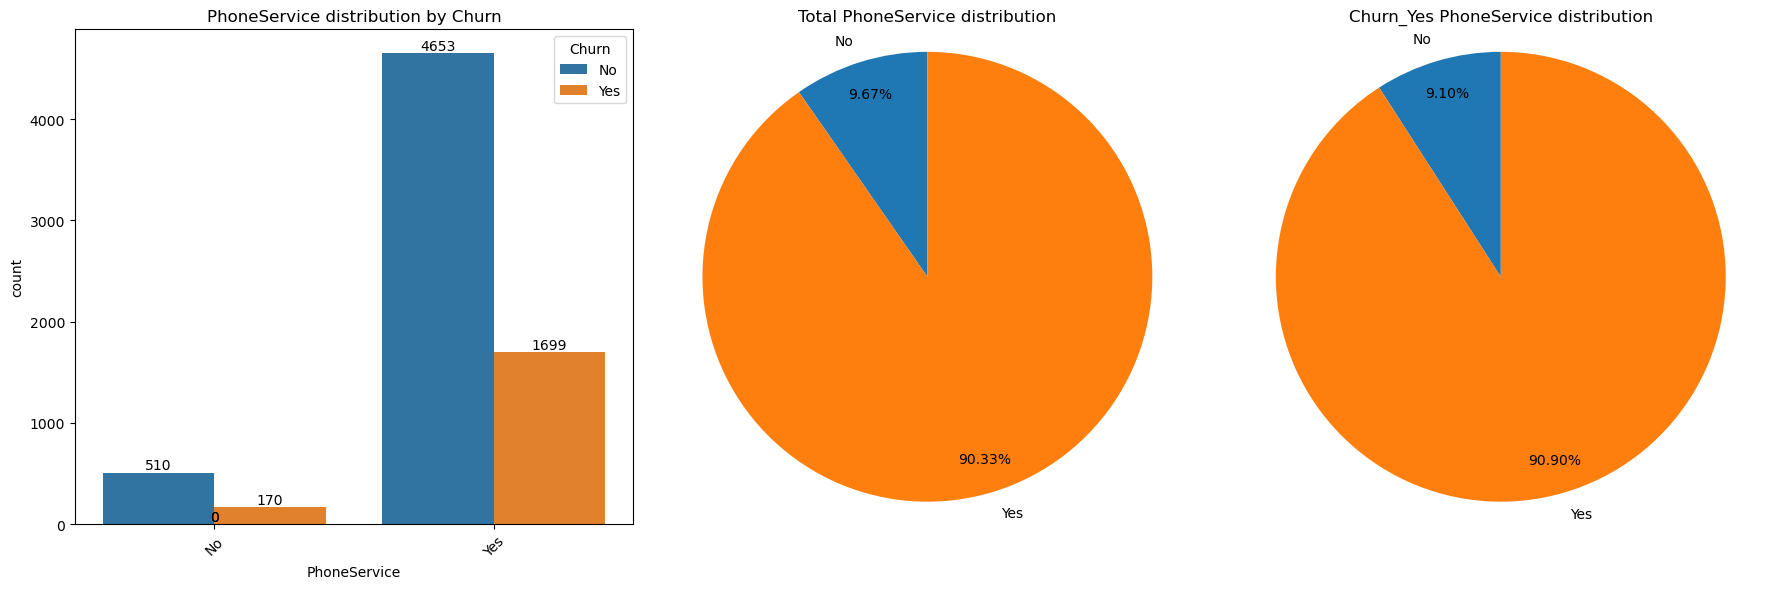

  PhoneService  Total Churn  Count      %
0          Yes   6352    No   4653  73.25
1          Yes   6352   Yes   1699  26.75
2           No    680    No    510  75.00
3           No    680   Yes    170  25.00


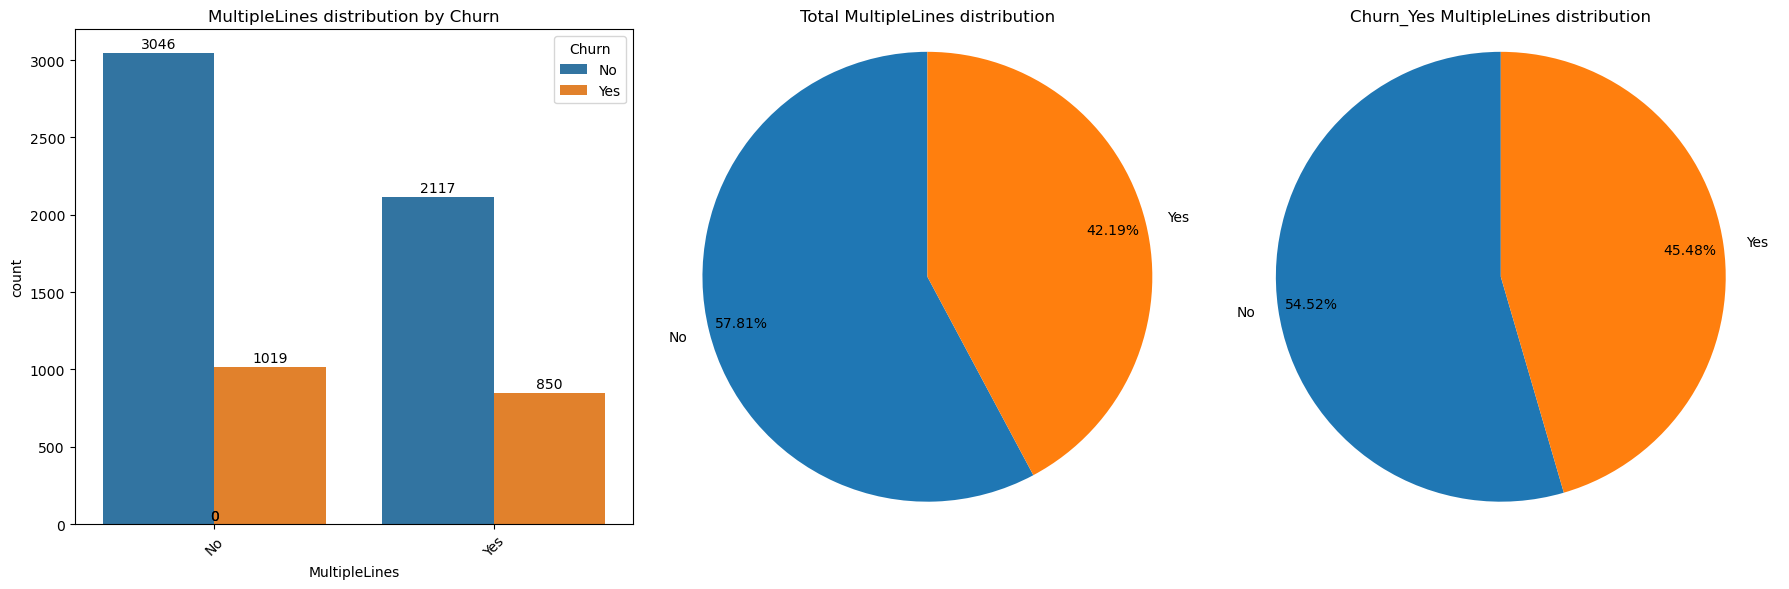

  MultipleLines  Total Churn  Count      %
0            No   4065    No   3046  74.93
1           Yes   2967    No   2117  71.35
2            No   4065   Yes   1019  25.07
3           Yes   2967   Yes    850  28.65


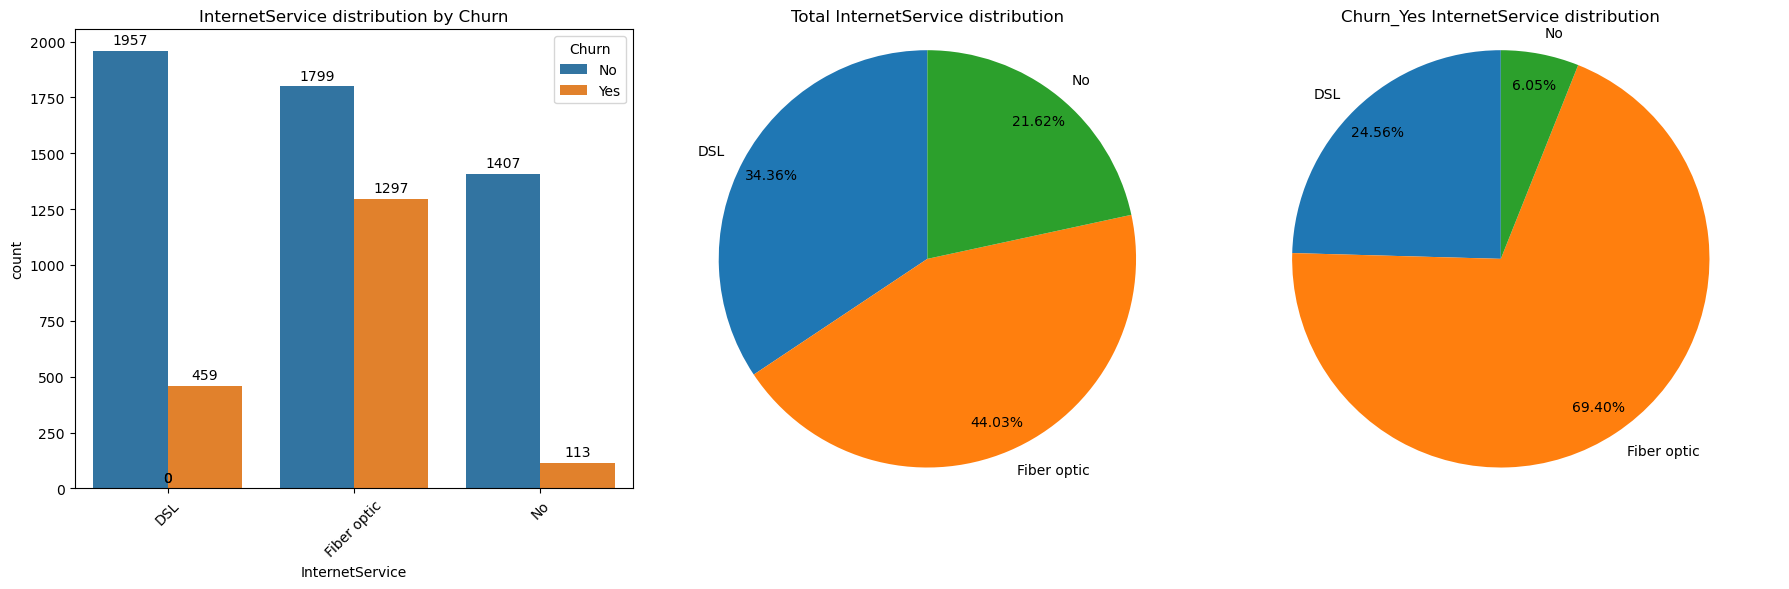

  InternetService  Total Churn  Count      %
0             DSL   2416    No   1957  81.00
1     Fiber optic   3096    No   1799  58.11
2              No   1520    No   1407  92.57
3     Fiber optic   3096   Yes   1297  41.89
4             DSL   2416   Yes    459  19.00
5              No   1520   Yes    113   7.43


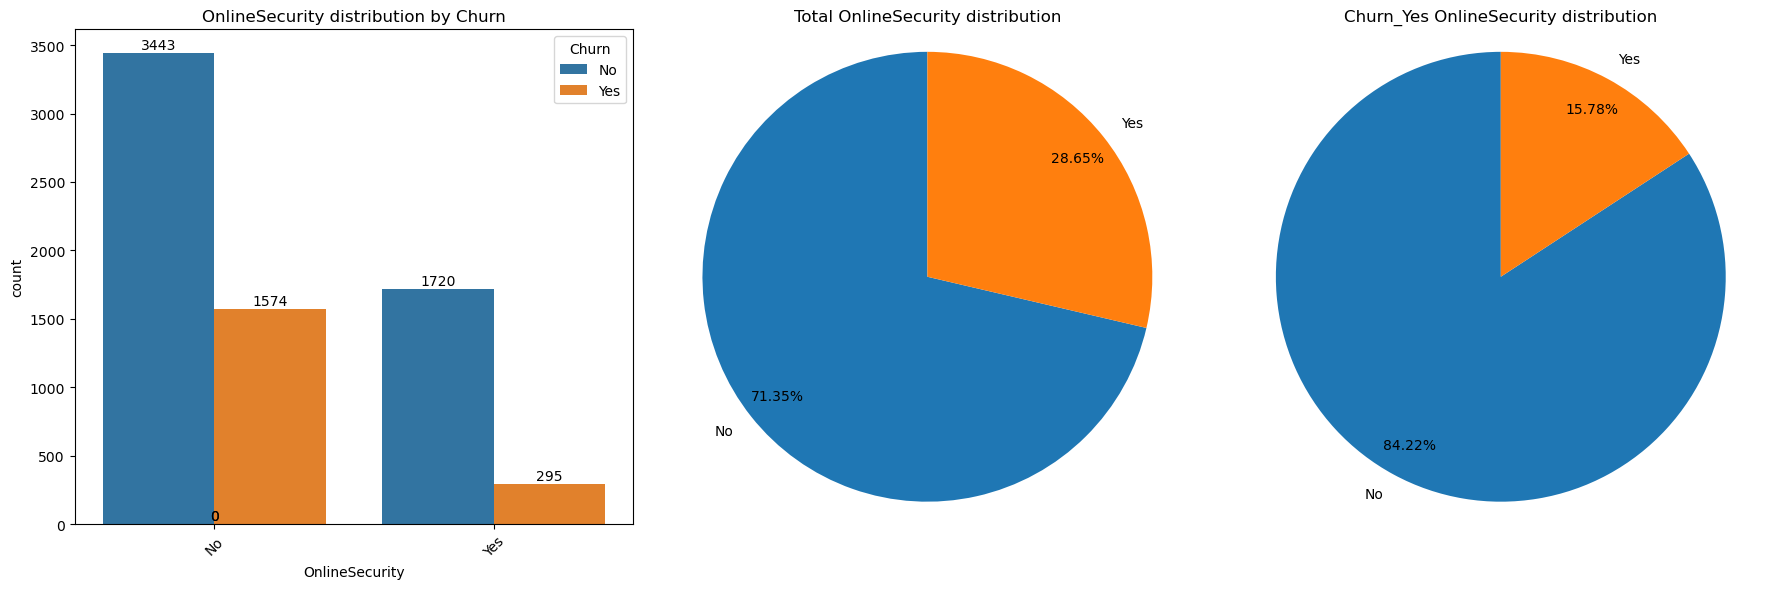

  OnlineSecurity  Total Churn  Count      %
0             No   5017    No   3443  68.63
1            Yes   2015    No   1720  85.36
2             No   5017   Yes   1574  31.37
3            Yes   2015   Yes    295  14.64


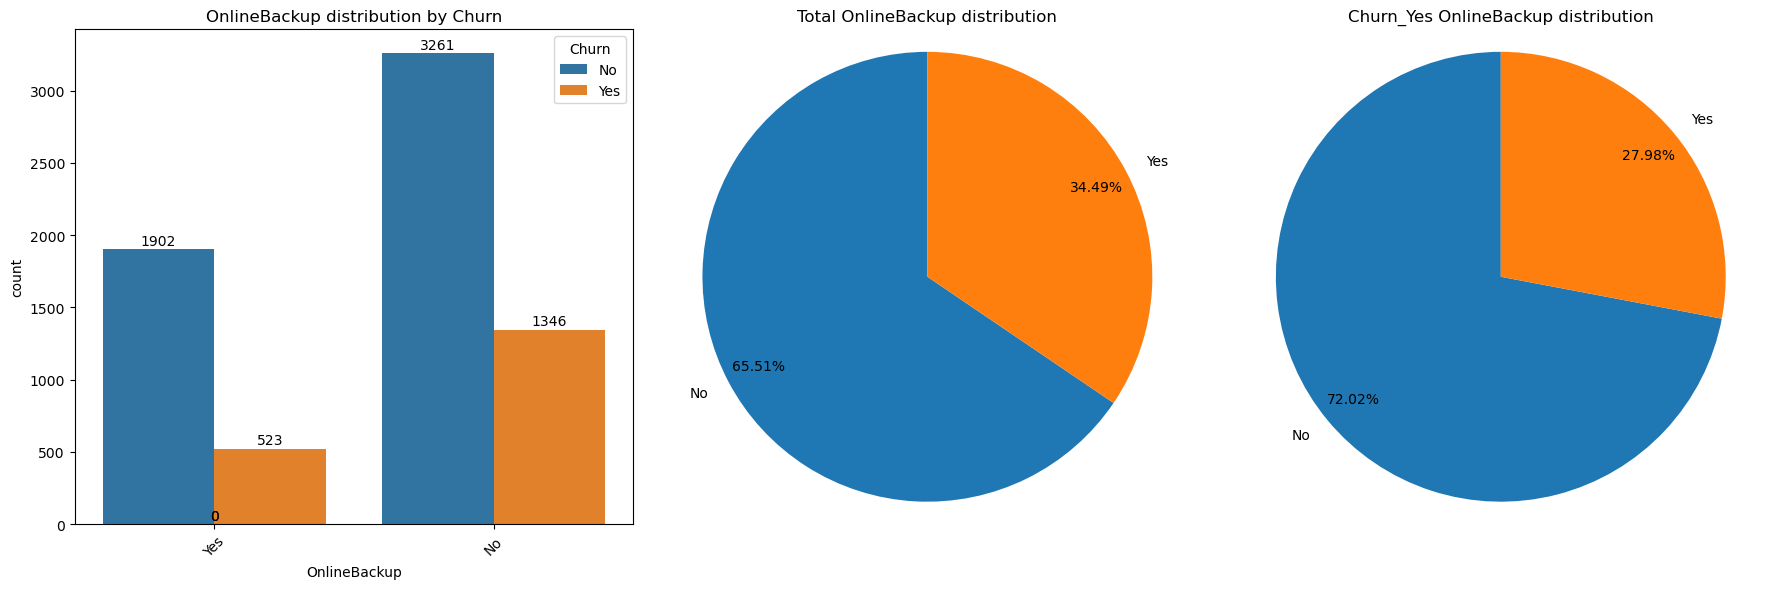

  OnlineBackup  Total Churn  Count      %
0           No   4607    No   3261  70.78
1          Yes   2425    No   1902  78.43
2           No   4607   Yes   1346  29.22
3          Yes   2425   Yes    523  21.57


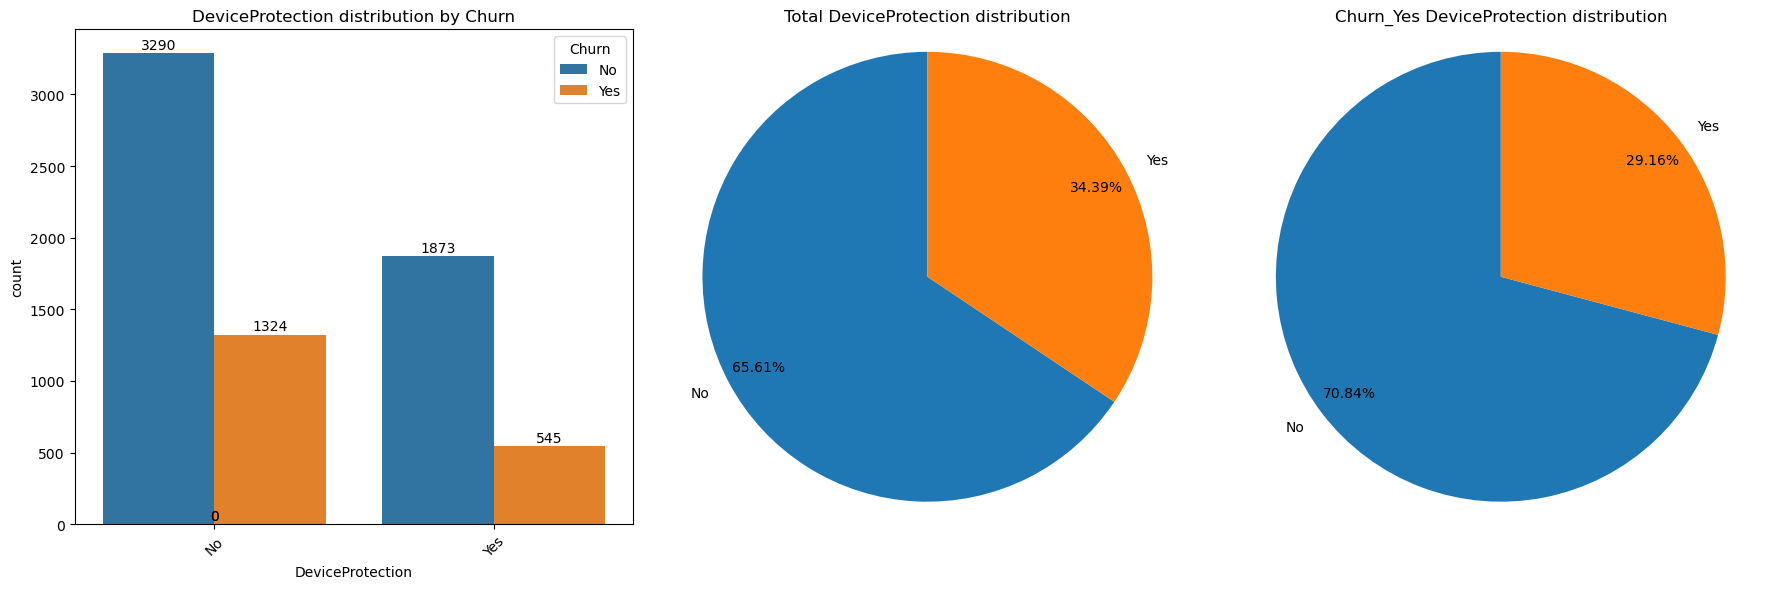

  DeviceProtection  Total Churn  Count      %
0               No   4614    No   3290  71.30
1              Yes   2418    No   1873  77.46
2               No   4614   Yes   1324  28.70
3              Yes   2418   Yes    545  22.54


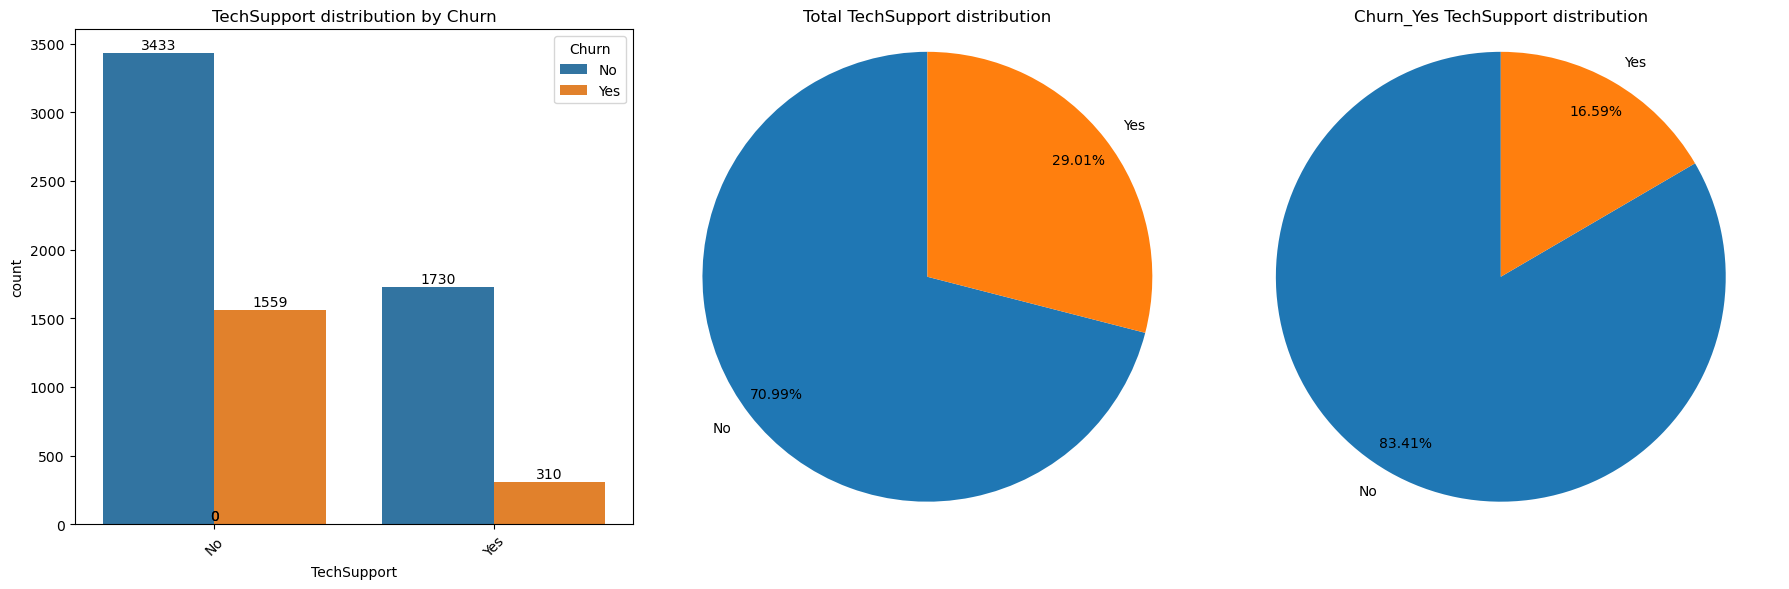

  TechSupport  Total Churn  Count      %
0          No   4992    No   3433  68.77
1         Yes   2040    No   1730  84.80
2          No   4992   Yes   1559  31.23
3         Yes   2040   Yes    310  15.20


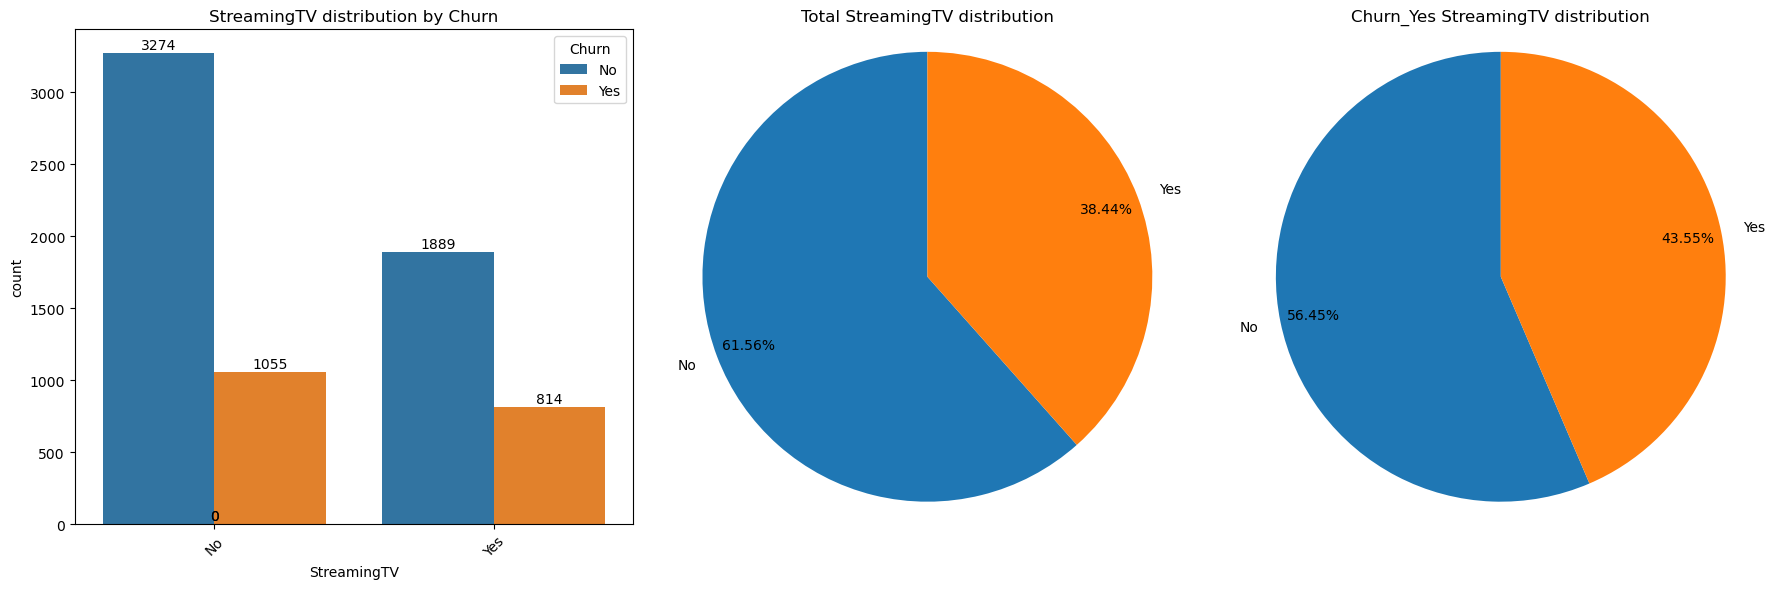

  StreamingTV  Total Churn  Count      %
0          No   4329    No   3274  75.63
1         Yes   2703    No   1889  69.89
2          No   4329   Yes   1055  24.37
3         Yes   2703   Yes    814  30.11


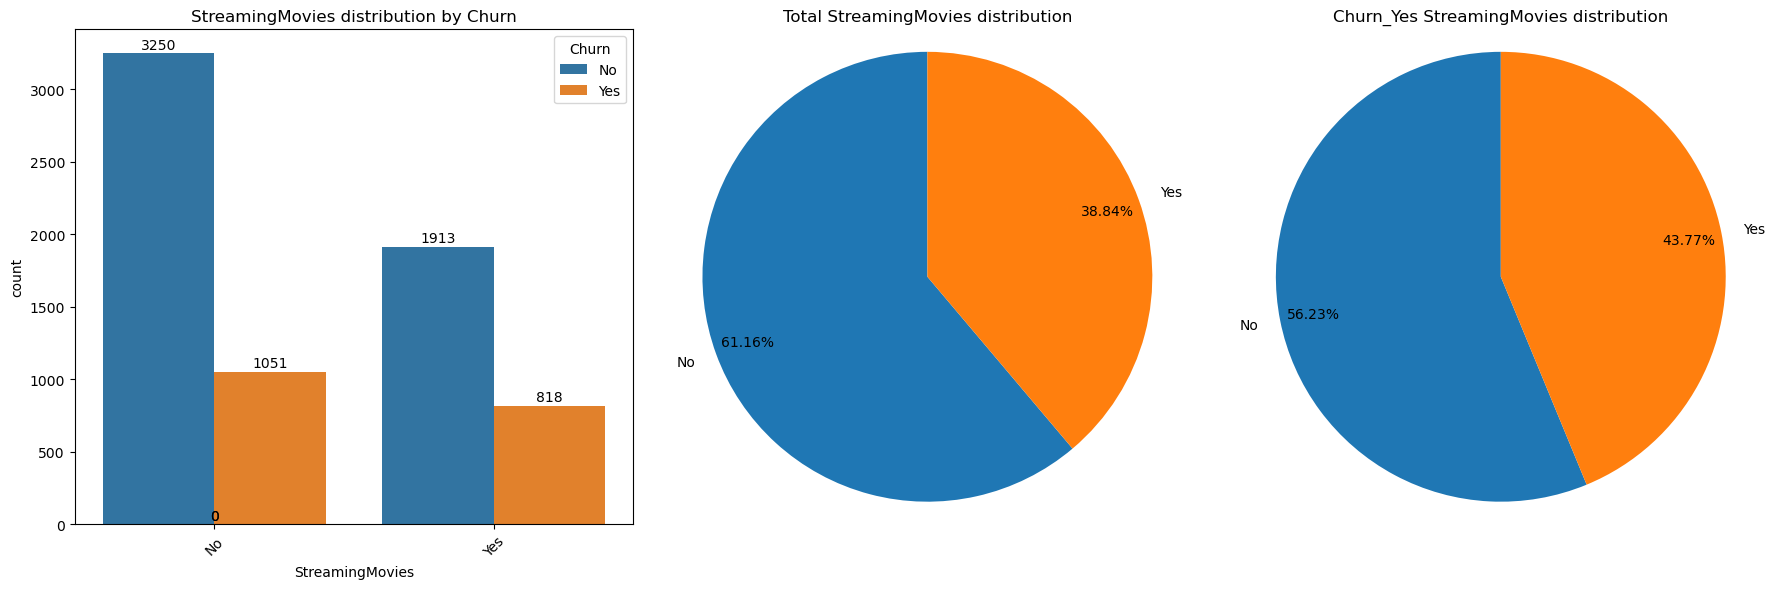

  StreamingMovies  Total Churn  Count      %
0              No   4301    No   3250  75.56
1             Yes   2731    No   1913  70.05
2              No   4301   Yes   1051  24.44
3             Yes   2731   Yes    818  29.95


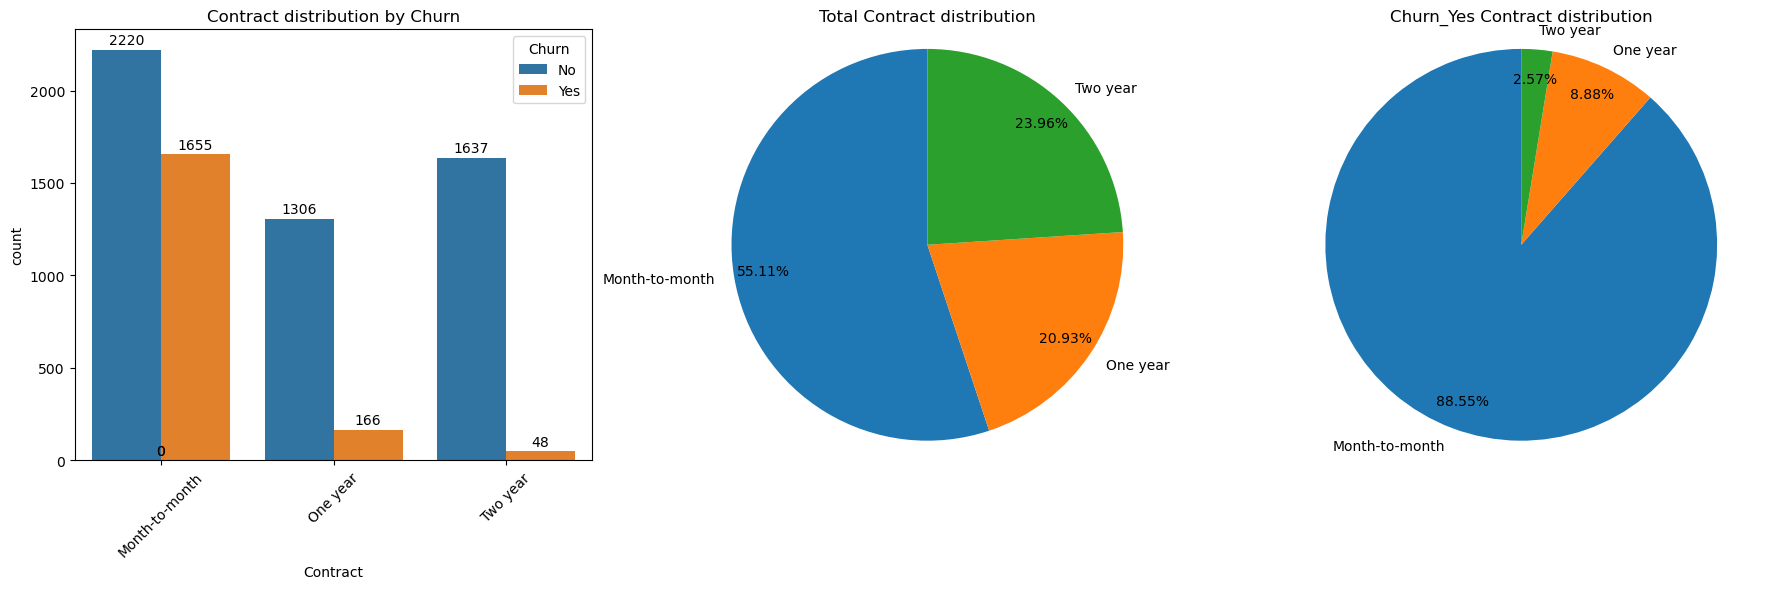

         Contract  Total Churn  Count      %
0  Month-to-month   3875    No   2220  57.29
1  Month-to-month   3875   Yes   1655  42.71
2        Two year   1685    No   1637  97.15
3        One year   1472    No   1306  88.72
4        One year   1472   Yes    166  11.28
5        Two year   1685   Yes     48   2.85


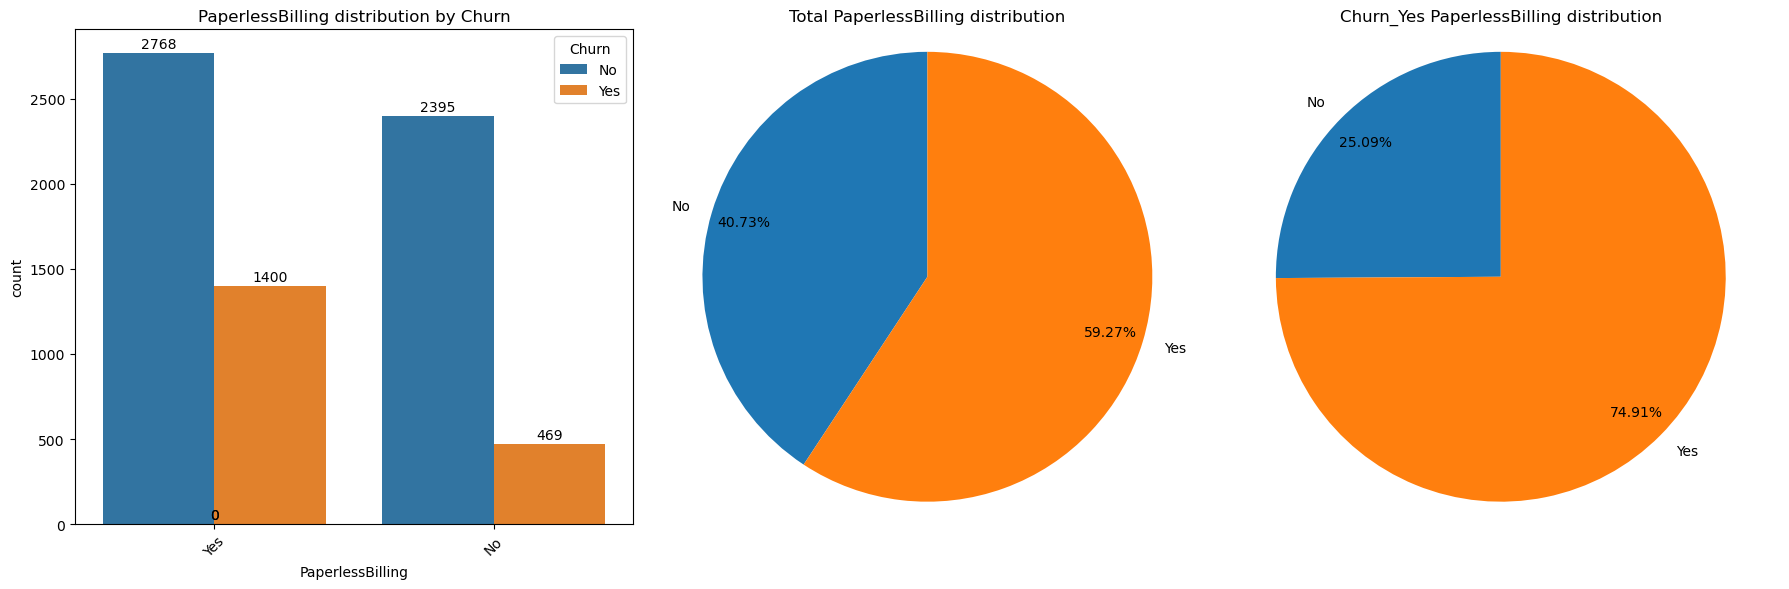

  PaperlessBilling  Total Churn  Count      %
0              Yes   4168    No   2768  66.41
1               No   2864    No   2395  83.62
2              Yes   4168   Yes   1400  33.59
3               No   2864   Yes    469  16.38


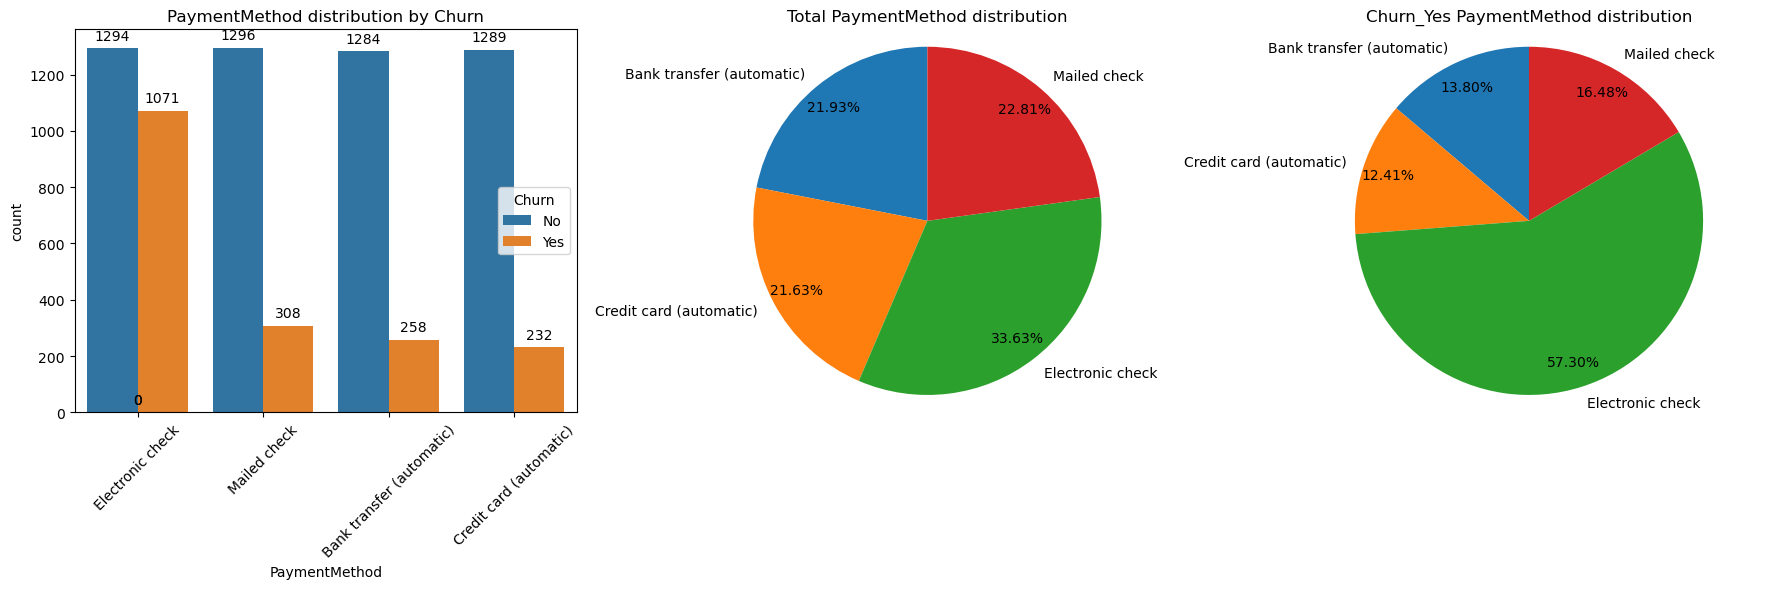

               PaymentMethod  Total Churn  Count      %
0               Mailed check   1604    No   1296  80.80
1           Electronic check   2365    No   1294  54.71
2    Credit card (automatic)   1521    No   1289  84.75
3  Bank transfer (automatic)   1542    No   1284  83.27
4           Electronic check   2365   Yes   1071  45.29
5               Mailed check   1604   Yes    308  19.20
6  Bank transfer (automatic)   1542   Yes    258  16.73
7    Credit card (automatic)   1521   Yes    232  15.25


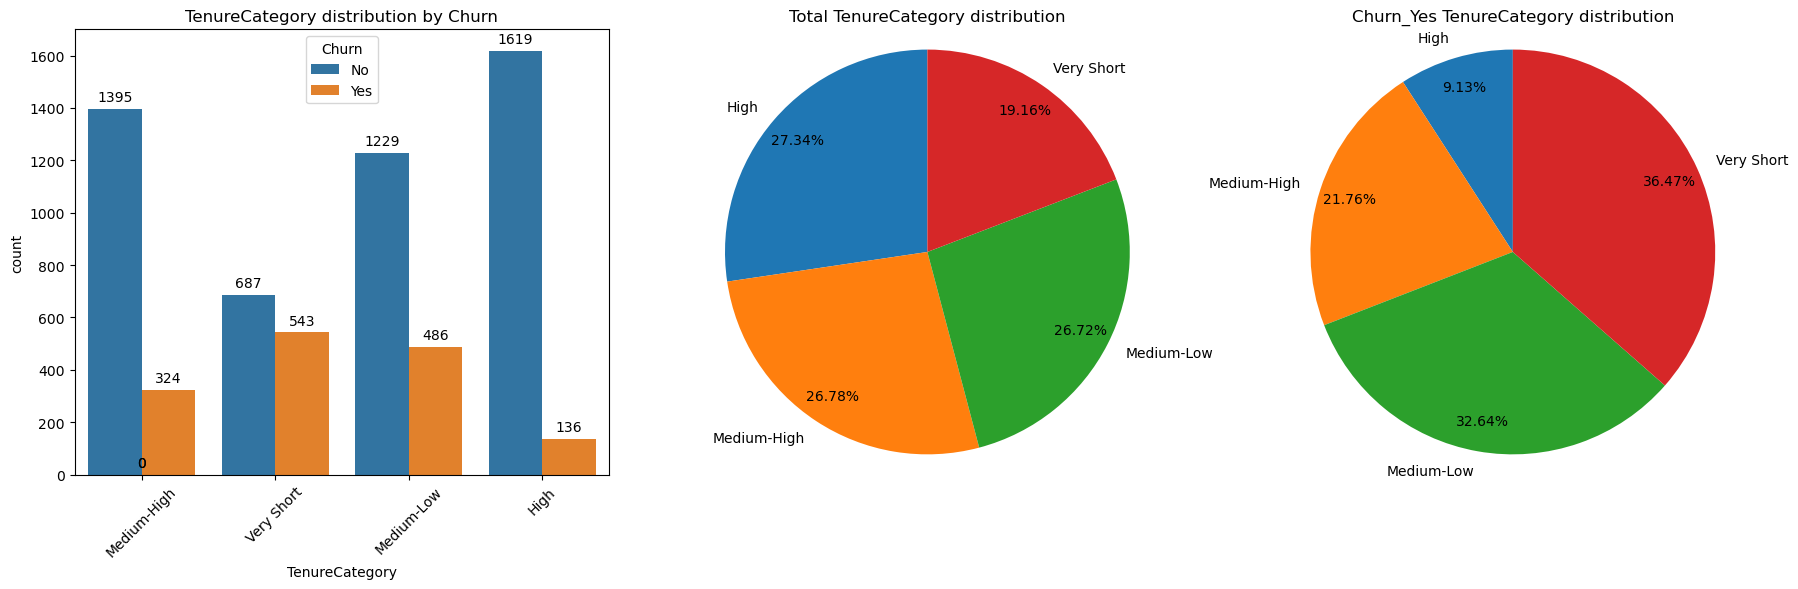

  TenureCategory  Total Churn  Count      %
0           High   1755    No   1619  92.25
1    Medium-High   1719    No   1395  81.15
2     Medium-Low   1715    No   1229  71.66
3     Very Short   1230    No    687  55.85
4     Very Short   1230   Yes    543  44.15
5     Medium-Low   1715   Yes    486  28.34
6    Medium-High   1719   Yes    324  18.85
7           High   1755   Yes    136   7.75


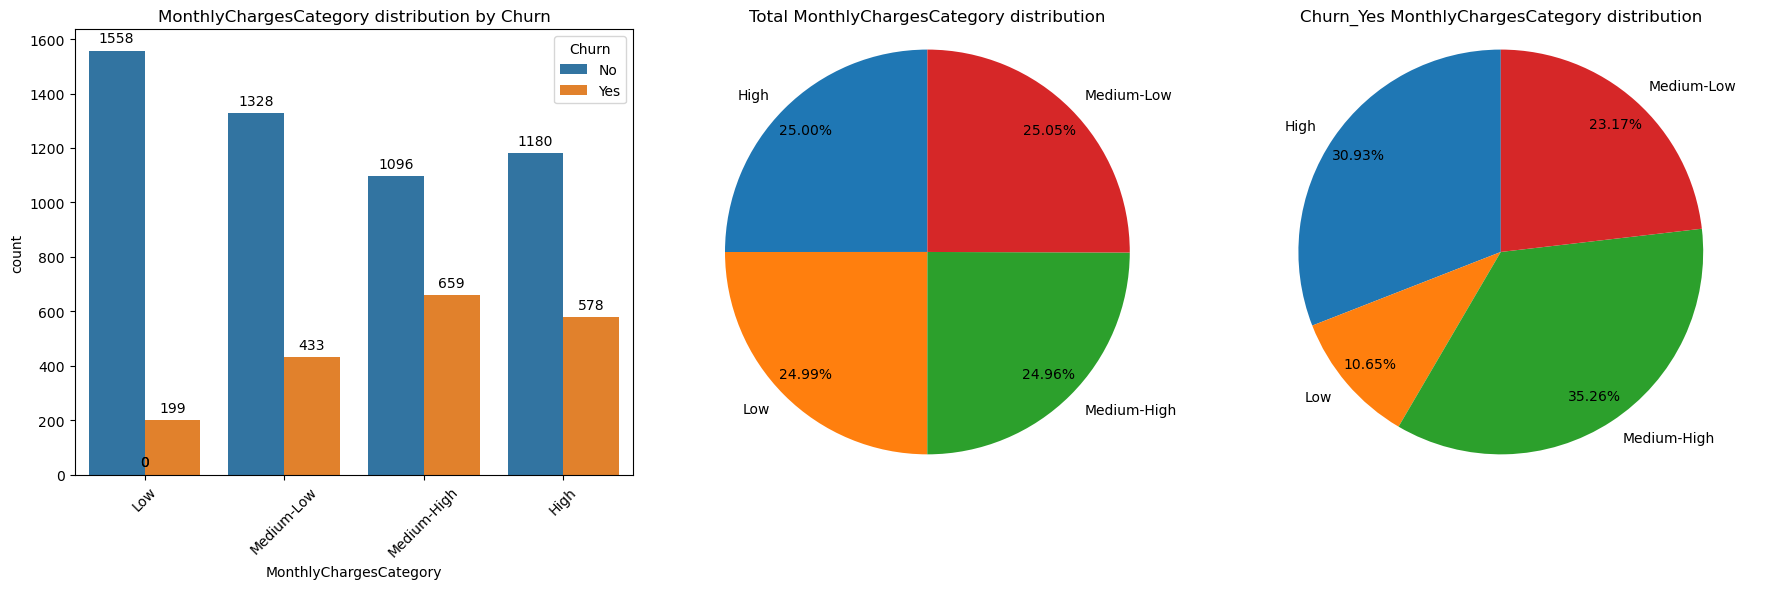

  MonthlyChargesCategory  Total Churn  Count      %
0                    Low   1757    No   1558  88.67
1             Medium-Low   1761    No   1328  75.41
2                   High   1758    No   1180  67.12
3            Medium-High   1755    No   1096  62.45
4            Medium-High   1755   Yes    659  37.55
5                   High   1758   Yes    578  32.88
6             Medium-Low   1761   Yes    433  24.59
7                    Low   1757   Yes    199  11.33


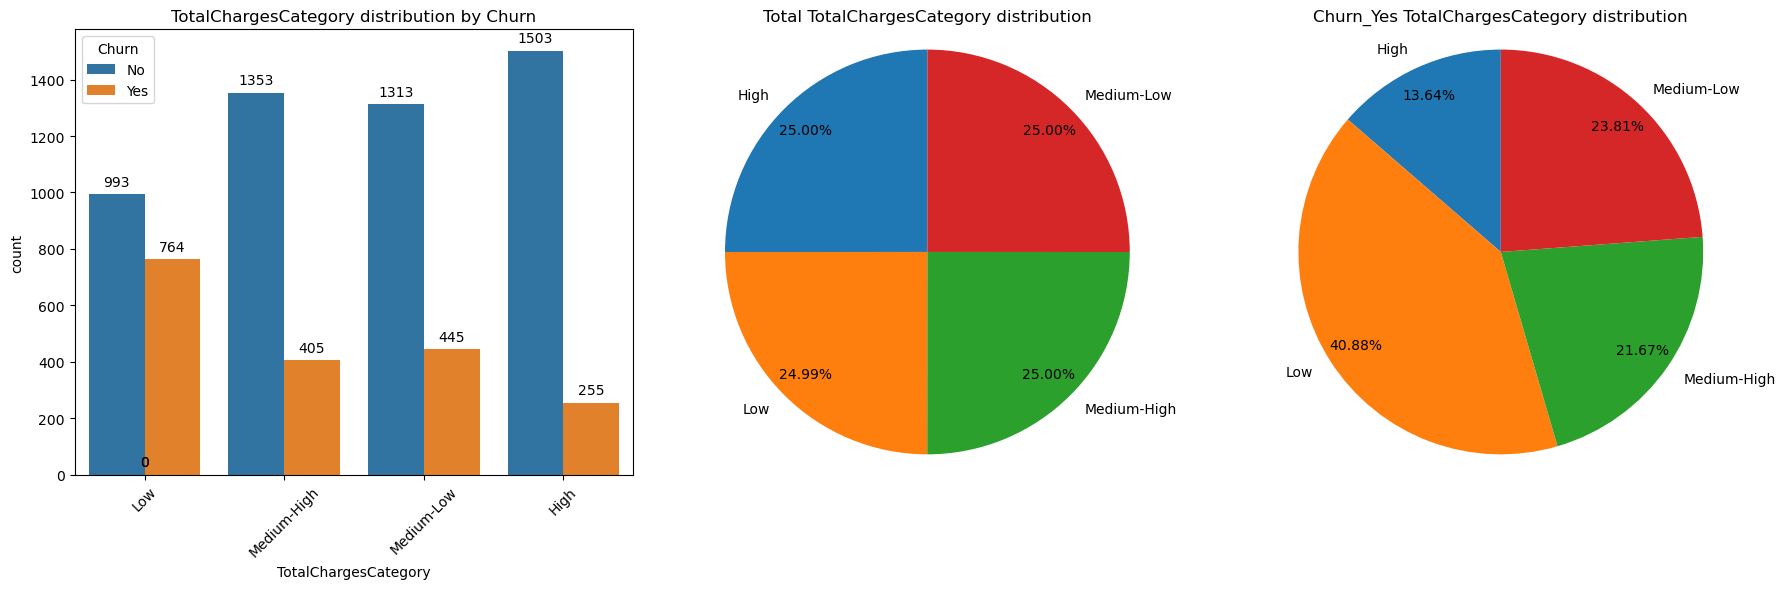

  TotalChargesCategory  Total Churn  Count      %
0                 High   1758    No   1503  85.49
1          Medium-High   1758    No   1353  76.96
2           Medium-Low   1758    No   1313  74.69
3                  Low   1757    No    993  56.52
4                  Low   1757   Yes    764  43.48
5           Medium-Low   1758   Yes    445  25.31
6          Medium-High   1758   Yes    405  23.04
7                 High   1758   Yes    255  14.51


In [10]:
churned_df = df[df['Churn']=='Yes'].copy()

filter_ = (df.dtypes == 'object') & (df.columns != 'Churn')
cols = list(df.columns[filter_])

for col in cols:
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    df.explorer.countplot_hue(col,'Churn',xtickrotation=45)
    plt.subplot(1,3,2)
    df.explorer.dist_pieplot(col)
    plt.title(f'Total {col} distribution')
    plt.subplot(1,3,3)
    churned_df.explorer.dist_pieplot(col)
    plt.title(f'Churn_Yes {col} distribution')
    plt.show()
    print(df.explorer.percentage_table(col,'Churn'))

### Churn:

Churn  Count      %
0    No   5163  73.42
1   Yes   1869  26.58

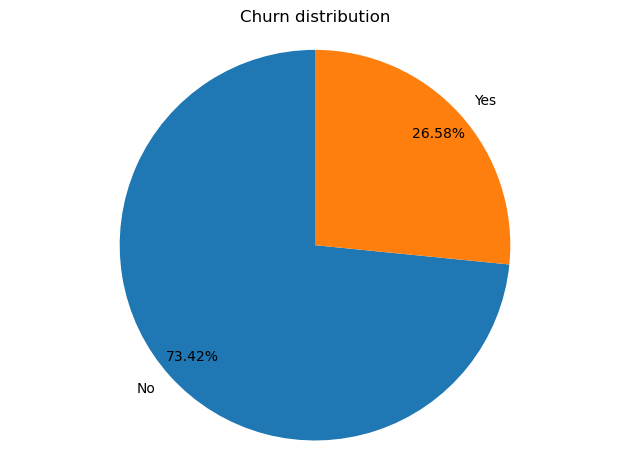

In [11]:
df.explorer.dist_pieplot('Churn')
churn_count = df["Churn"].value_counts()
percentage_table = pd.DataFrame({
    'Churn':churn_count.index,
    'Count':churn_count.values})
percentage_table['%'] = round(percentage_table.Count / percentage_table.Count.sum() * 100,2)
percentage_table

## Mutivariate Analysis:

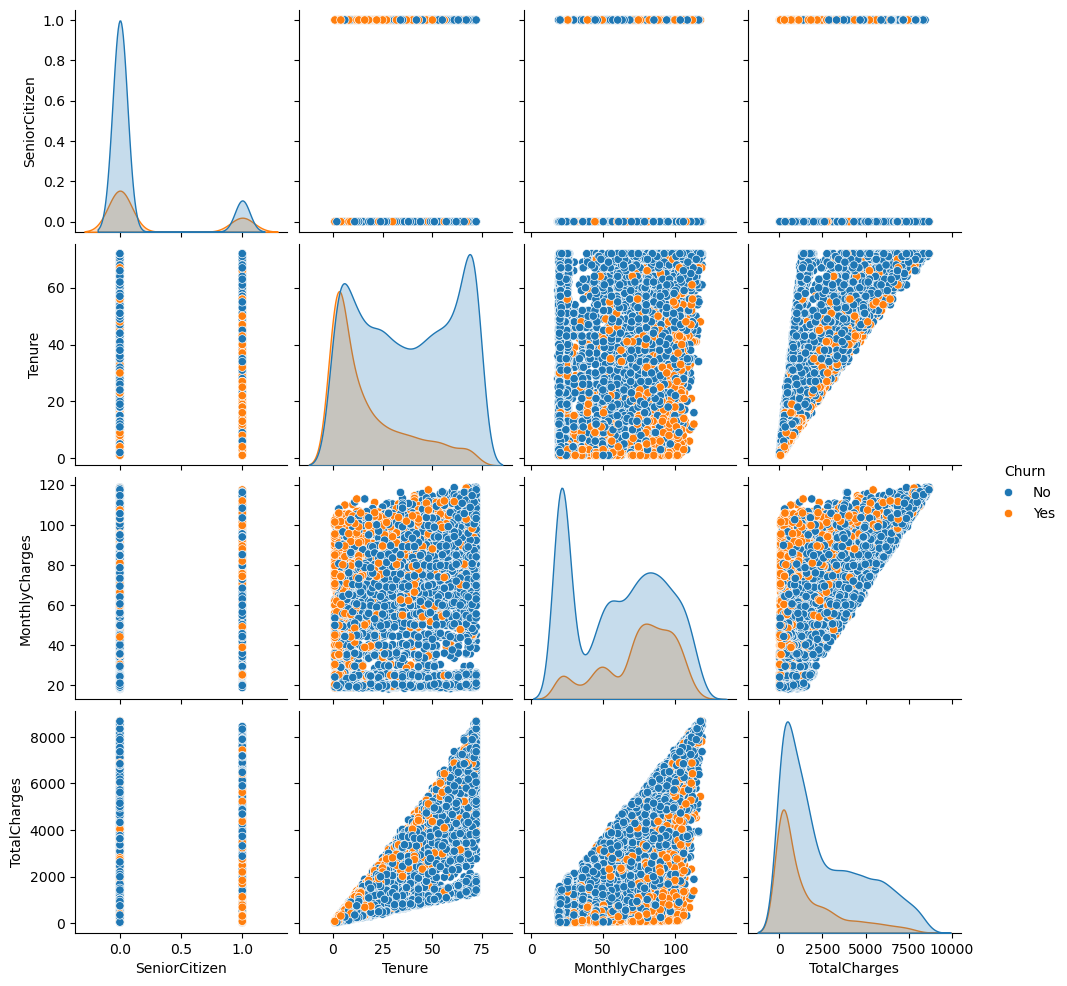

In [12]:
sns.pairplot(
    data=df,
    hue='Churn'
)
plt.show()

## "Tenure" Vs "MonthlyCharges":

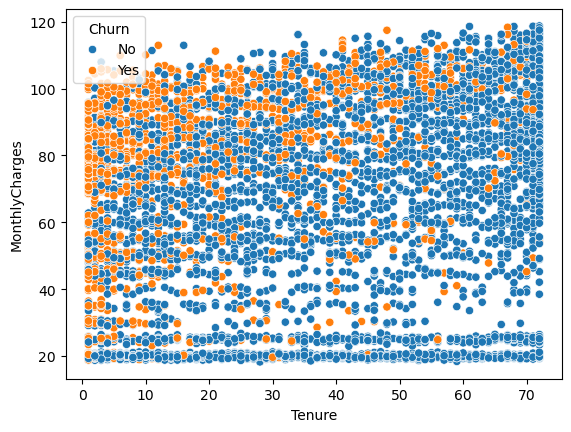

In [13]:
df.explorer.scatter_corr('Tenure','MonthlyCharges','Churn')

### Correlation Analysis

- **Pearson Correlation Coefficient:** The correlation coefficient between `Tenure` and `MonthlyCharges` is **0.248**.
  - This value indicates a **weak positive correlation**. As the tenure increases, monthly charges tend to increase, although the relationship is not very strong.

- **Scatter Plot:**
  - The plot shows that the **highest concentration of customers who churn** are those with **high monthly charges** and **short tenure** as customers. This suggests that new customers facing higher costs are more likely to abandon the service.




## MonthlyCharges Vs TotalCharges

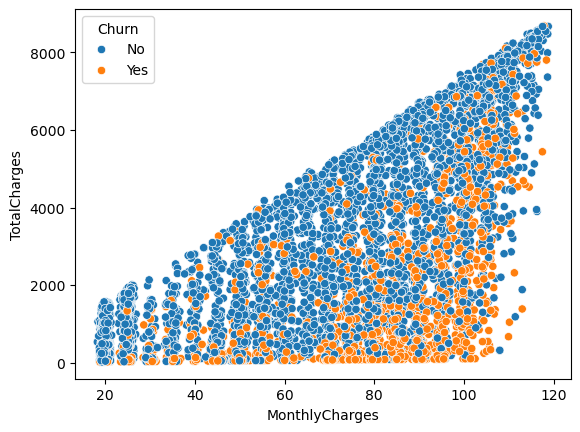

In [14]:
df.explorer.scatter_corr('MonthlyCharges','TotalCharges','Churn')

- Correlation between MonthlyCharges and TotalCharges: The Pearson correlation coefficient between these two variables is 0.651. This indicates a moderate positive correlation, meaning that as monthly charges increase, total charges also tend to increase, though not perfectly.

#### Scatterplot Analysis:

- The scatterplot reveals a higher concentration of customers who churn in the lower-left section of the graph.
- This area represents customers with high monthly charges but low total charges, which suggests that they are new customers who are paying high fees but have not been with the service long enough to accumulate substantial total charges.
### Interpretation:

- These findings imply that new customers with high monthly charges are more likely to churn.
- The high cost relative to the short tenure may lead to dissatisfaction, causing them to leave the service before accumulating higher total charges.
- Understanding that high monthly and total charges appear to be closely related to churn, we will conduct an analysis to see how each categorical variable relates to the generation of charges.






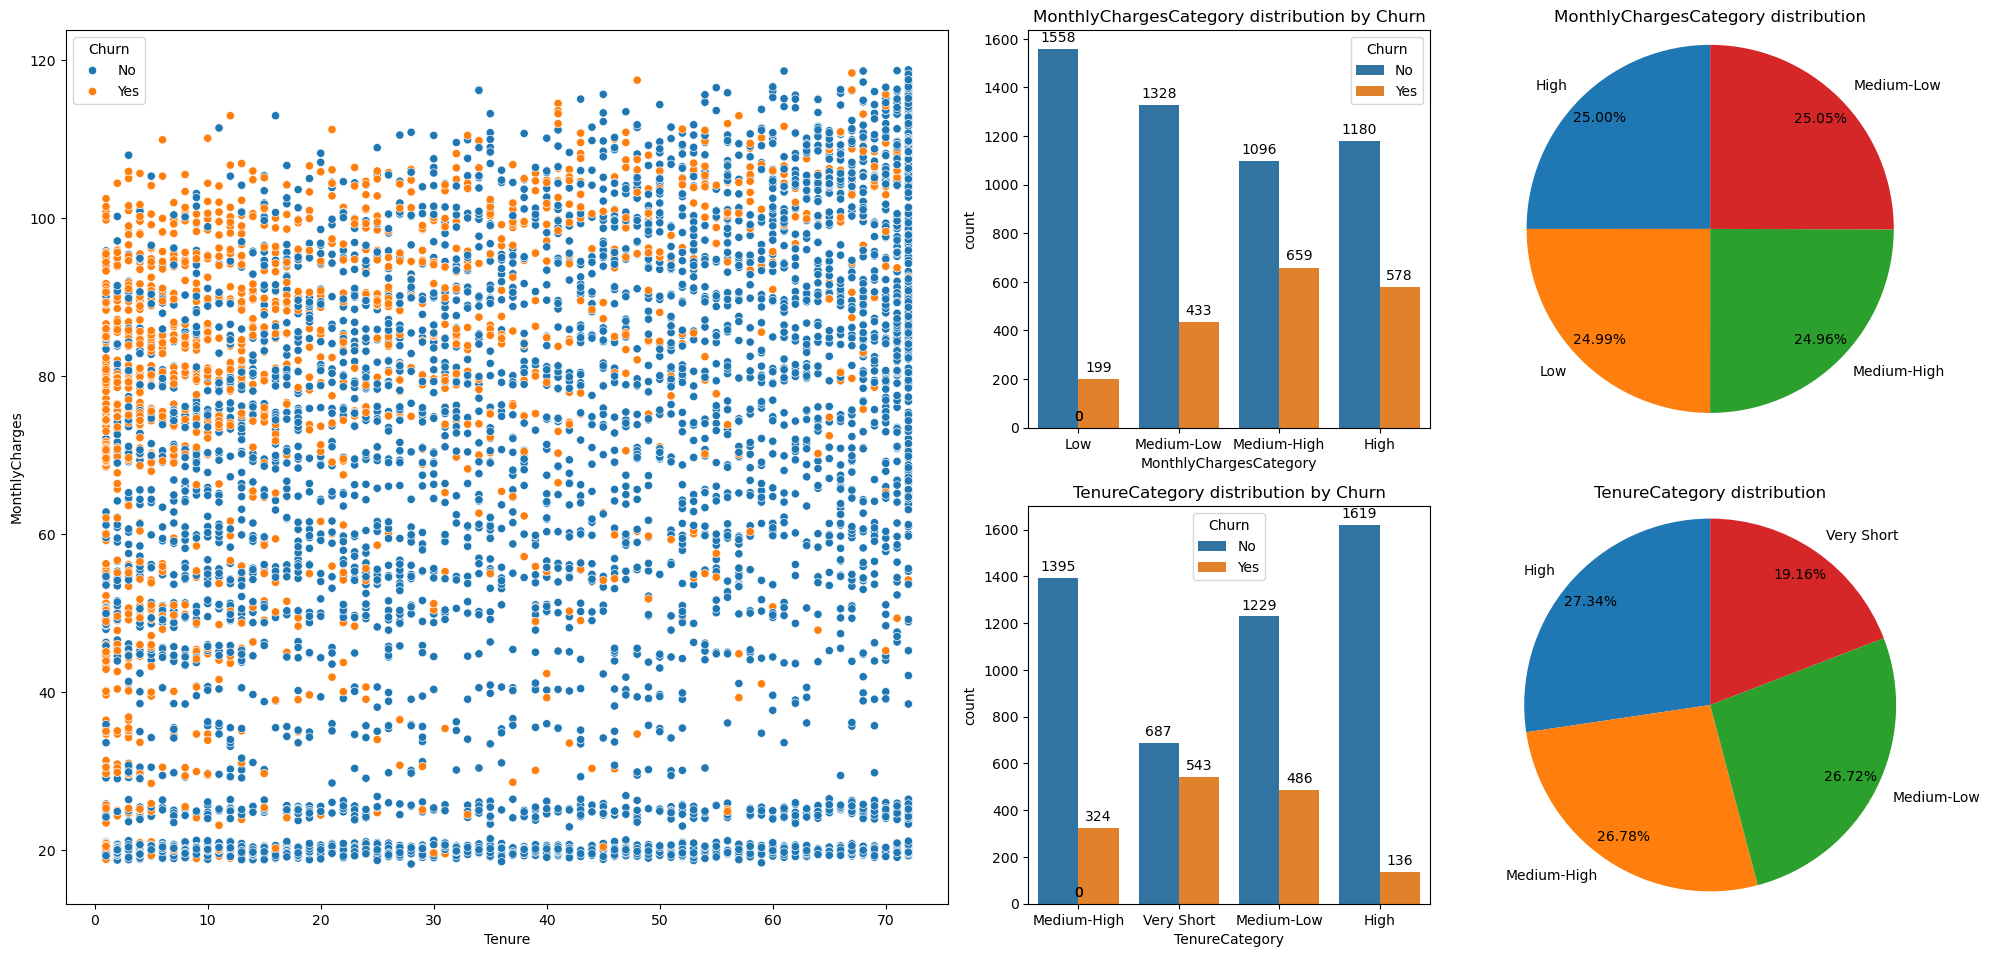

In [15]:
# Create the figure
fig = plt.figure(figsize=(20, 14))
gs = gridspec.GridSpec(3, 4, figure=fig)

# Large subplot
ax1 = fig.add_subplot(gs[:2, :2])  # Large subplot
df.explorer.scatter_corr('Tenure','MonthlyCharges','Churn')


# Small subplots
ax2 = fig.add_subplot(gs[0, 2])  # Small subplot 1
df.explorer.countplot_hue('MonthlyChargesCategory', hue='Churn')


ax3 = fig.add_subplot(gs[0, 3])  # Small subplot 2
df.explorer.dist_pieplot('MonthlyChargesCategory')


ax4 = fig.add_subplot(gs[1, 2])  # Small subplot 3
df.explorer.countplot_hue('TenureCategory', hue='Churn')


ax5 = fig.add_subplot(gs[1, 3])  # Small subplot 4
df.explorer.dist_pieplot('TenureCategory')


# Adjust spacing between subplots
plt.tight_layout()

# Display the result
plt.show()

grouping = df[df['Churn']=='Yes'].groupby(['MonthlyChargesCategory','TenureCategory'])['Churn'].value_counts().to_frame().sort_values('count', ascending=False).reset_index()
grouping['Percentage'] = round(grouping['count'] / grouping['count'].sum() * 100, 2)
grouping.head(20).style.bar(['count','Percentage'], color='darkred')

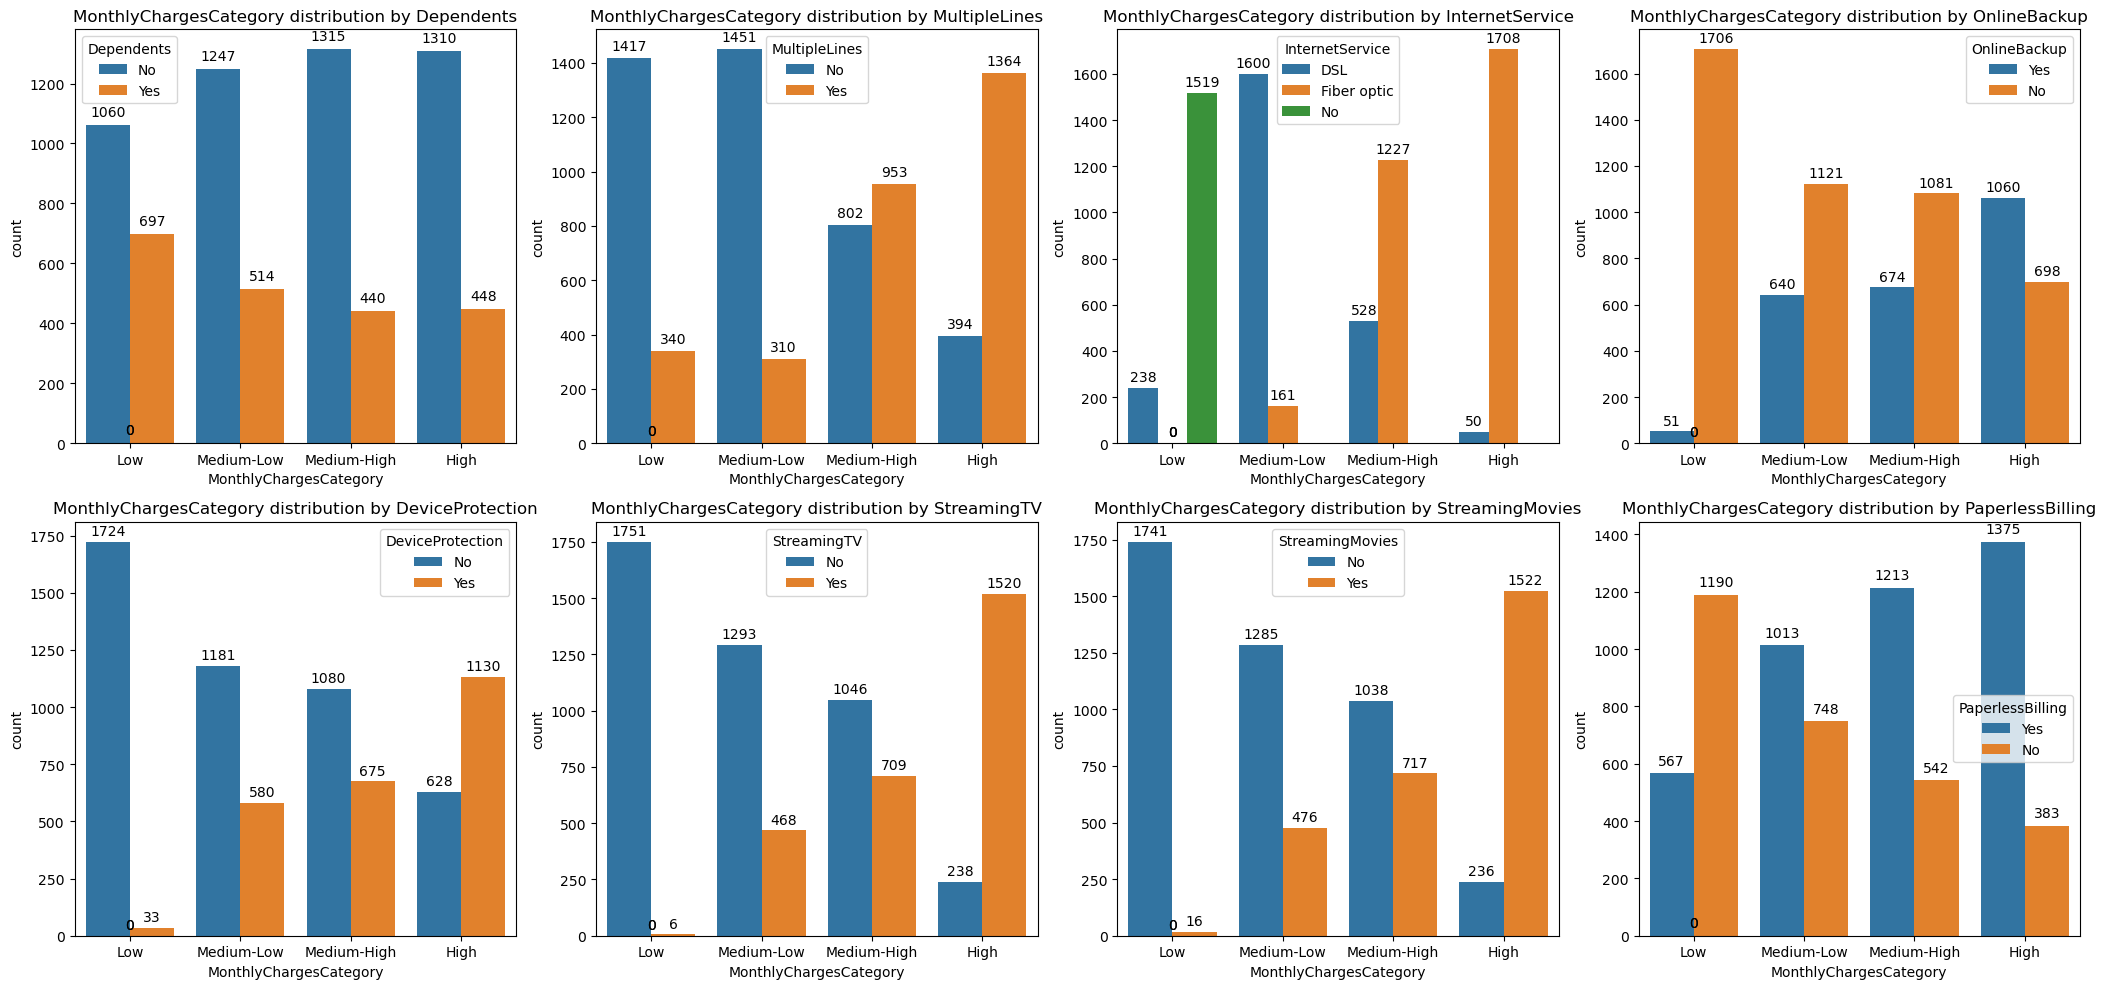

In [16]:
row = 1
plt.figure(figsize=(21,10))
for col in df.select_dtypes(include='object').drop(columns=['PaymentMethod','TenureCategory','Gender','Partner','Churn','MonthlyChargesCategory','TotalChargesCategory','PhoneService','OnlineSecurity','TechSupport','Contract']).columns:
    plt.subplot(2,4,row)
    df.explorer.countplot_hue('MonthlyChargesCategory',hue=col)
    plt. tight_layout()
    row += 1 
plt.show()

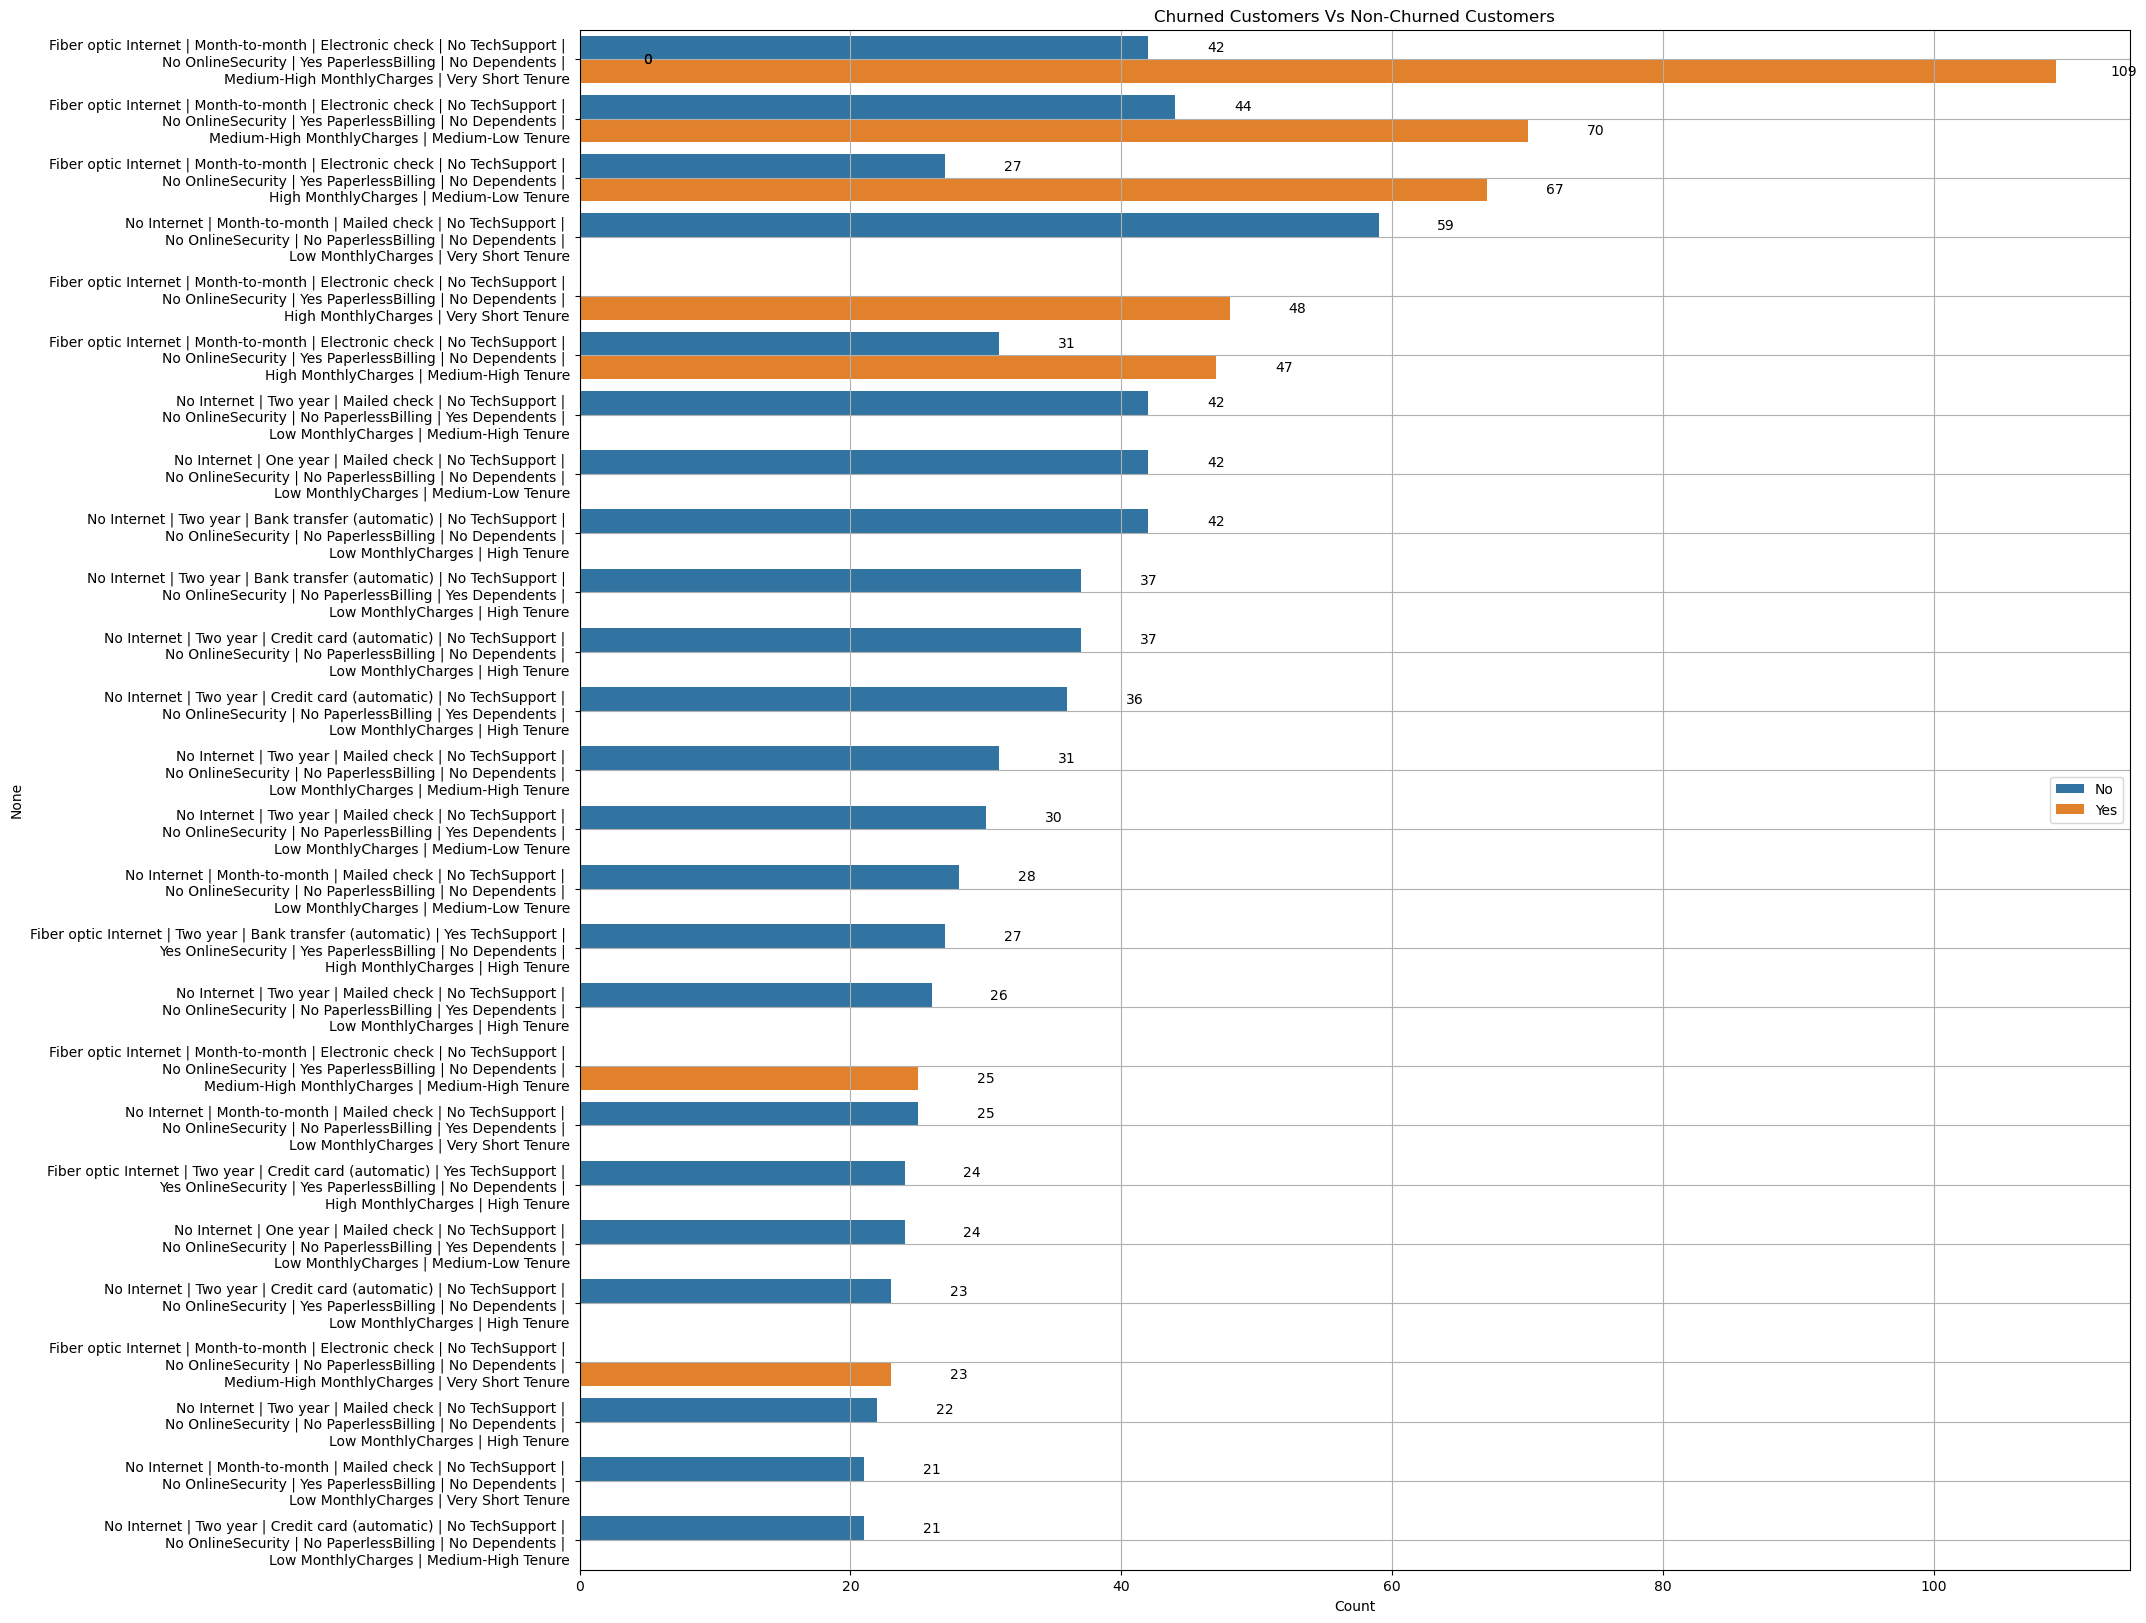

In [17]:
def countplot_hue(data):
    # Group the data and calculate counts and percentages
    grouped = data.groupby(
        [
            'InternetService','Contract','PaymentMethod','TechSupport','OnlineSecurity','PaperlessBilling','Dependents','MonthlyChargesCategory','TenureCategory'
        ]
    )['Churn'].value_counts().to_frame().sort_values('count', ascending=False).reset_index().head(30)
    
    # Rename columns and calculate percentage
    grouped.rename(columns={'count': 'Count'}, inplace=True)
    grouped['Percentage'] = round(grouped['Count'] / grouped['Count'].sum() * 100, 2)
    
    # Create the bar plot
    bar_plot = sns.barplot(
        data=grouped,
        orient='h',  # Horizontal orientation
        x='Count',
        y=grouped['InternetService'] + ' Internet | ' + grouped['Contract'] + ' | '  \
            + grouped['PaymentMethod'] + ' | ' + grouped['TechSupport'] +  \
                ' TechSupport | ' + '\n' + grouped['OnlineSecurity'] + ' OnlineSecurity | ' + grouped['PaperlessBilling'] \
                    + ' PaperlessBilling | ' + grouped['Dependents'] + ' Dependents | ' + '\n' + grouped['MonthlyChargesCategory'] \
                        + ' MonthlyCharges | ' + grouped['TenureCategory'] + ' Tenure',
        hue='Churn',
        hue_order=sorted(grouped['Churn'].unique(), reverse=False)
    )

    # Add count labels to each bar
    for bar in bar_plot.patches:
        # Get the count value of each bar
        count = int(bar.get_width())
        bar_plot.text(
            bar.get_width() + 5,                # Position the text slightly to the right of the bar
            bar.get_y() + bar.get_height() / 2, # Center the text vertically on each bar
            count,                              # Display the count value as the label
            ha='center',                        # Horizontal alignment centered
            va='center'                         # Vertical alignment centered
        )
    handles, labels = bar_plot.get_legend_handles_labels()
    plt.legend(handles, labels, loc='center right', title='Churn')
    
plt.figure(figsize=(20,20))
plt.title('Churned Customers Vs Non-Churned Customers')
countplot_hue(df)
plt.legend(loc='center right')
plt.grid()
plt.show()

grouping = df.groupby(['InternetService','Contract','PaymentMethod','TechSupport','OnlineSecurity','PaperlessBilling','Dependents','MonthlyChargesCategory','TenureCategory'])['Churn'].value_counts().to_frame().sort_values('count', ascending=False).reset_index()
grouping['Percentage'] = round(grouping['count'] / grouping['count'].sum() * 100, 2)
grouping.head(30).style.bar(['count','Percentage'], color='darkred')

# Key Findings

## Monthly Charges and Tenure

- **Customers with high monthly charges** and **short tenure** exhibit a **significantly higher churn rate**.
- The combination of **high costs** and a **limited relationship with the service** seems to generate **dissatisfaction**, prompting these customers to **cancel the service before accumulating higher total charges**.

## Relative Comparisons

- While customers with **low charges** or **longer tenures** show **greater stability**, **new customers with high monthly charges** represent a **critical challenge for retention**.

---

# Recommendations

## Focus on New Customers with High Monthly Charges

- **Offer special incentives**, such as **temporary discounts** or **extended trial periods**, to reduce the perception of high costs in the early months.
- **Implement personalized welcome programs** that highlight the value of the service and strengthen the relationship from the start.

## Pricing Strategy Optimization

- Review the pricing applied to new customers, especially those with **high monthly charges**, to make it more competitive during the early stages of service.

## Segmentation and Predictive Models

- **Develop a predictive model** to identify **new customers at risk of churn** due to high monthly charges and proactively offer solutions.
- **Implement specific segmentation strategies** to personalize the experience for customers during their initial period.

---


## Saving the dataset into a csv file

In [18]:
df.to_csv('../telco_customer_churn/data/cleaned_dataset.csv')

##